In [1]:
from controller import *

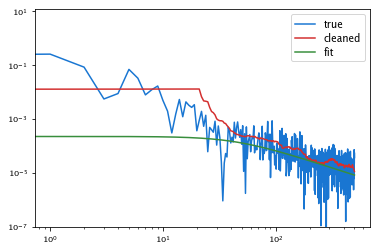

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


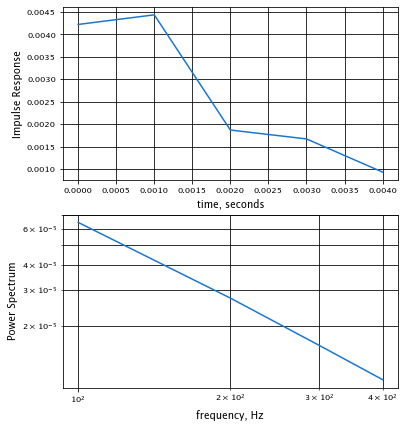

In [2]:
impulse = make_impulse(truth[:1000], N=10, plot=True)

last_P [ 1.00075057e+00 -9.52597590e-05  1.37387179e-04  5.32943402e-05
  1.41288003e-04  1.78183301e-04  2.26514135e-04  4.04827953e-04
  4.52263760e-04  1.07181220e-03]
curr_P [ 1.00075057e+00 -9.52605162e-05  1.37386363e-04  5.32940116e-05
  1.41287735e-04  1.78183179e-04  2.26514083e-04  4.04827956e-04
  4.52263890e-04  1.07181233e-03]
steady state at step 11


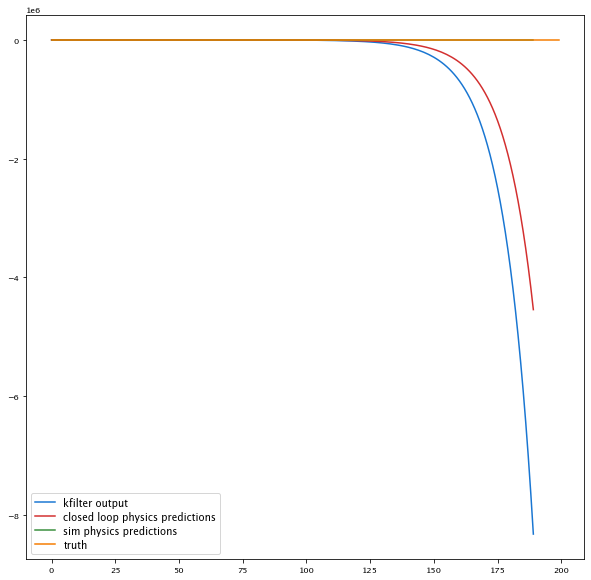

In [3]:
plt.figure(figsize=(10,10))
kalman.kfilter.state = np.flip(truth[:10])
run, predict = kalman.kfilter.run(truth[kalman.kfilter.state.size:200], save_physics=True)
plt.plot(run, label = 'kfilter output')
plt.plot(predict, label='closed loop physics predictions')
kalman.kfilter.state = np.flip(truth[:10])
plt.plot(kalman.kfilter.physics_predict(200 - kalman.kfilter.state.size), label='sim physics predictions')
plt.plot(truth[:200], label='truth')
plt.legend()

In [4]:
show_control('kalman')

AttributeError: 'Controller' object has no attribute 'make_state'